In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates

import xarray as xr
import cartopy.crs as ccrs
ds = xr.load_dataset('../../data/fluxes_all_cruises_compilation.nc')


In [ ]:
### Also see code/wavecnn/test_visual

In [ ]:
pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
              '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
colors = cm.tab10(np.linspace(0, 1, 10))

for i, p in enumerate(np.unique(ds.pcode.dropna(dim='time'))):
    idx = ds.pcode == p
    pcode = pcodes[str(int(p))]
    cs = ax.scatter(ds.lon[idx], ds.lat[idx],
                    s=2, color=colors[i], label='{}'.format(pcode), transform=ccrs.PlateCarree())
leg = plt.legend(bbox_to_anchor=(1.05, 0.1), loc=3, fontsize=14)
for handle in leg.legendHandles:
    handle.set_sizes([25])

In [ ]:
''' Figuring out which regions to sample '''
YR = 2022
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g01.nc' %YR
ds = xr.open_dataset(file,chunks={'time':'500MB'})

ax = plt.axes(projection=ccrs.PlateCarree())

ds_sub = ds.sel(longitude=slice(60,90),latitude=slice(-30,0))
Uwnd = ds_sub.uwnd.values
lon = ds_sub.longitude.values
lat = ds_sub.latitude.values
plt.contourf(lon, lat, Uwnd[1], 60, transform=ccrs.PlateCarree())

# ds_sub = ds.sel(longitude=slice(-150,-120),latitude=slice(-30,0))
# Uwnd = ds_sub.uwnd.values
# lon = ds_sub.longitude.values
# lat = ds_sub.latitude.values
# plt.contourf(lon, lat, Uwnd[1], 60, transform=ccrs.PlateCarree())

# [-45,-13.5,28.5,60]
ds_sub = ds.sel(longitude=slice(-50,-18.5),latitude=slice(23.5,55))
Uwnd = ds_sub.uwnd.values
lon = ds_sub.longitude.values
lat = ds_sub.latitude.values
plt.contourf(lon, lat, Uwnd[1], 60, transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_global()

In [ ]:
# Check the r2 and MSE 
# Good = (np.isfinite(HsOut)&np.isfinite(HSval))
# r2 = np.corrcoef(HsOut[Good],HSval[Good])[0,1]**2
# MSE = np.sqrt(np.mean((HsOut[Good]-HSval[Good])**2))

f,a = plt.subplots(2, 2, figsize=(16,6), subplot_kw={'projection':ccrs.PlateCarree()})
# ax = a.ravel()[0]
# Outputs
ax = a[0,1]
c = ax.pcolormesh(lons, lats, outmaps[0], vmax=8, vmin=-8, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
plt.colorbar(c, ax=ax)
ax = a[1,1]
c = ax.pcolormesh(lons, lats, outmaps[1], vmax=8, vmin=-8, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
plt.colorbar(c, ax=ax)
# Inputs
ax = a[0,0]
c = ax.pcolormesh(lons, lats, Uhs, vmax=8, vmin=-8,  transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
plt.colorbar(c, ax=ax)
ax = a[1,0]
c = ax.pcolormesh(lons, lats, Vhs, vmax=8, vmin=-8, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
plt.colorbar(c, ax=ax)

# with open('/net3/bgr/Datasets/ML_WW3/Networks/'+network_name+'/validation_stats.pkl',"wb") as FILE:
#     pickle.dump( [TIME_,r2_,MSE_], FILE )

In [ ]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

lons = ds.longitude.values
lats = ds.latitude.values
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.Robinson())
c = ax.pcolormesh(lons, lats, rms_taver, vmax=2, vmin=-2, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
plt.colorbar(c, ax=ax)

ax = fig.add_subplot(2, 1, 2, projection=ccrs.Robinson())
# c = ax.pcolormesh(lons, lats, r2_taver, vmax=1, vmin=-1, transform=ccrs.PlateCarree(), cmap='RdBu_r')
c = ax.pcolormesh(lons, lats, r2_value, vmax=1, vmin=0.5, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()

plt.colorbar(c, ax=ax)

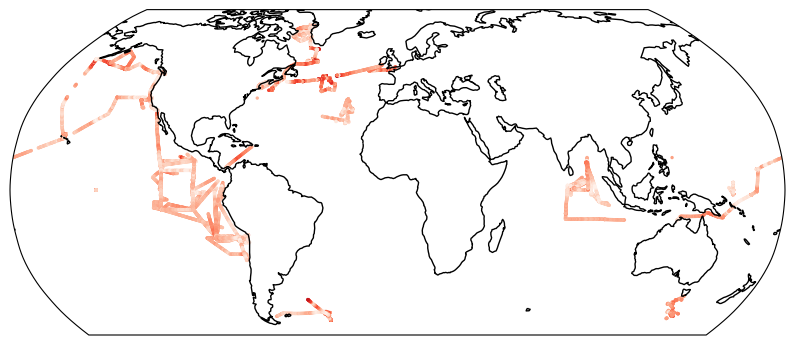

In [42]:
# I wanted to make a plot that shows trajectory in space time and color coded by the quantity of interest
pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
          '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
# ax.set_global()
ax.coastlines()
colors = cm.tab10(np.linspace(0, 1, 10))

U_ = ds.U.values[~np.isnan(ds.U.values)]
U_.max()

for i, p in enumerate(np.unique(ds.pcode.dropna(dim='time'))):
    idx = ds.pcode == p
    pcode = pcodes[str(int(p))]
    cs = ax.scatter(ds.lon[idx], ds.lat[idx],
                    s=2, color=plt.get_cmap('Reds')(ds.U[idx]/U_.max()), transform=ccrs.PlateCarree())


['2011-09-03T00:24:59.904000000' '2011-09-03T01:30:00.000000000'
 '2011-09-03T02:30:00.115200000' ... '2011-12-31T21:24:59.904000000'
 '2011-12-31T22:30:00.000000000' '2011-12-31T23:30:00.115200000']


/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


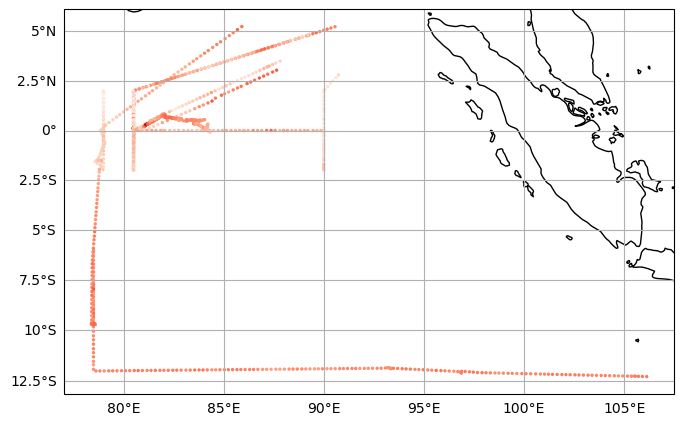

In [138]:
# I wanted to make a plot that shows trajectory in space time and color coded by the quantity of interest
pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
          '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# ax.set_global()
ax.coastlines()
colors = cm.tab10(np.linspace(0, 1, 10))

idx = ds.pcode == 68
U_ = ds.U.values[idx]
U_ = U_[~np.isnan(U_)]
pcode = pcodes[str(int(p))]
cs = ax.scatter(ds.lon[idx], ds.lat[idx],
                s=2, color=plt.get_cmap('Reds')(ds.U[idx]/U_.max()), transform=ccrs.PlateCarree())
print(ds.time.values[idx])
gl = ax.gridlines()
gl.xlabels_bottom = True
gl.ylabels_left = True